# Các thư viện

Nếu bạn đang sử dụng môi trường: __min_ds-env__, hãy install thêm 2 thư viện để trực quan:
- `pip install geopandas`
- `pip install plotly-express`

In [2]:
import geopandas as gpd
import plotly.express as px
import matplotlib.pyplot as plt

import pandas as pd

# Đọc dữ liệu

In [3]:
weather_df = pd.read_csv('data/raw/daily_weather_data.csv')
weather_df.head(5)

,date,country,city,Latitude,Longitude,tavg,tmin,tmax,wdir,wspd,pres
0,21-07-2018,Abkhazia,Sukhumi,43.001525,41.023415,23.4,20.9,25.5,329.0,9.3,1009.6
1,22-07-2018,Abkhazia,Sukhumi,43.001525,41.023415,23.5,21.0,25.7,337.0,9.4,1010.0
2,23-07-2018,Abkhazia,Sukhumi,43.001525,41.023415,23.5,21.1,25.5,41.0,8.2,1007.7
3,24-07-2018,Abkhazia,Sukhumi,43.001525,41.023415,24.3,20.8,27.1,10.0,9.3,1004.4
4,25-07-2018,Abkhazia,Sukhumi,43.001525,41.023415,26.5,22.7,30.0,9.0,9.7,1002.0


# Hiểu dữ liệu

### Phân bố vị trí địa lý của các thành phố (city)

In [4]:
geo_cols = ['country', 'city', 'Latitude', 'Longitude']

In [5]:
df_geo = gpd.GeoDataFrame(weather_df[geo_cols], 
            geometry=gpd.points_from_xy(weather_df.Longitude, weather_df.Latitude))

points_from_xy: Tạo ra bản đồ dạng 2 chiều

In [6]:
df_geo

,country,city,Latitude,Longitude,geometry
0,Abkhazia,Sukhumi,43.001525,41.023415,POINT (41.02341 43.00153)
1,Abkhazia,Sukhumi,43.001525,41.023415,POINT (41.02341 43.00153)
2,Abkhazia,Sukhumi,43.001525,41.023415,POINT (41.02341 43.00153)
3,Abkhazia,Sukhumi,43.001525,41.023415,POINT (41.02341 43.00153)
4,Abkhazia,Sukhumi,43.001525,41.023415,POINT (41.02341 43.00153)
...,...,...,...,...,...
324642,Western Sahara,El Aaiún,27.125287,-13.162500,POINT (-13.16250 27.12529)
324643,Western Sahara,El Aaiún,27.125287,-13.162500,POINT (-13.16250 27.12529)
324644,Western Sahara,El Aaiún,27.125287,-13.162500,POINT (-13.16250 27.12529)
324645,Western Sahara,El Aaiún,27.125287,-13.162500,POINT (-13.16250 27.12529)


Lấy dataset (nền bản đồ) có sẵn từ geopandas (lowres: low resolution):

In [7]:
world_data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

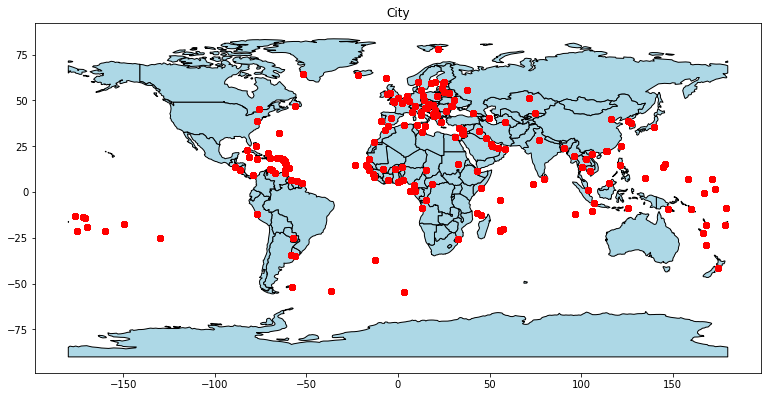

In [8]:
axis = world_data.plot(color='lightblue', edgecolor='black')

df_geo.plot(ax = axis, color='red') #points on map
plt.title("Cities")

#change the size (make it bigger)
fig = plt.gcf()
fig.set_size_inches(13, 9)
fig.savefig('cities.png', dpi = 200)
plt.show()

Nhận xét: Dữ liệu thu thập được phân bố chủ yếu ở _Châu Âu_, _Trung Mĩ_, _Tây Phi_, _rải rác ở Đông Nam Á_

#### Các quốc gia xuất hiện (không tính tần suất xuất hiện)

- Ta chỉ cần tên các _quốc gia_ thay vì để tất cả dữ liệu vào.
- Để xem tên _quốc gia_: đưa trỏ chuột lại gần.
- Những _quốc gia_ xuất hiện là màu xanh.

In [10]:
countries = weather_df['country'].unique()

country_visual = px.choropleth(countries, 
                                locationmode='country names',
                                locations=countries)

In [11]:
country_visual.show()